In [9]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [10]:
from tensorflow.keras.callbacks import Callback

class MyCallback(Callback):
    def __init__(self):
        super().__init__()
        self.intermediate_outputs = []

    def on_epoch_end(self, epoch, logs=None):
        intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
                                                         outputs=model.layers[-2].output)
        intermediate_output = intermediate_layer_model.predict(x_train)

        self.intermediate_outputs.append(intermediate_output)

In [11]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# ラベルを付ける
y_train = y_train % 2
y_test = y_test % 2

# モデルを定義する
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# モデルをコンパイルする
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# モデルをトレーニングする
# model.fit(x_train, y_train, epochs=10)
my_callback = MyCallback()
model.fit(x_train, y_train, epochs=10, callbacks=[my_callback])

# 中間層の出力をリストに格納する
intermediate_outputs = my_callback.intermediate_outputs
print('Intermediate output shape:', intermediate_outputs[0].shape)

# モデルを評価する
test_loss, test_acc = model.evaluate(x_test, y_test)

# 結果を出力する
print(f'テスト用データに対する損失: {test_loss:.4f}')
print(f'テスト用データに対する精度: {test_acc:.4f}')


Epoch 1/10
   6/1875 [..............................] - ETA: 18s - loss: 22.4300 - accuracy: 0.5104  WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0035s vs `on_train_batch_end` time: 0.0052s). Check your callbacks.


1875/1875 [==============================] - 13s 7ms/step - loss: 0.7632 - accuracy: 0.5257
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5897 - accuracy: 0.6658
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4979 - accuracy: 0.7772
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4135 - accuracy: 0.8577
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3458 - accuracy: 0.9002
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3016 - accuracy: 0.9212
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2650 - accuracy: 0.9361
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2336 - accuracy: 0.9469
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2033 - accuracy: 0.9581
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1786

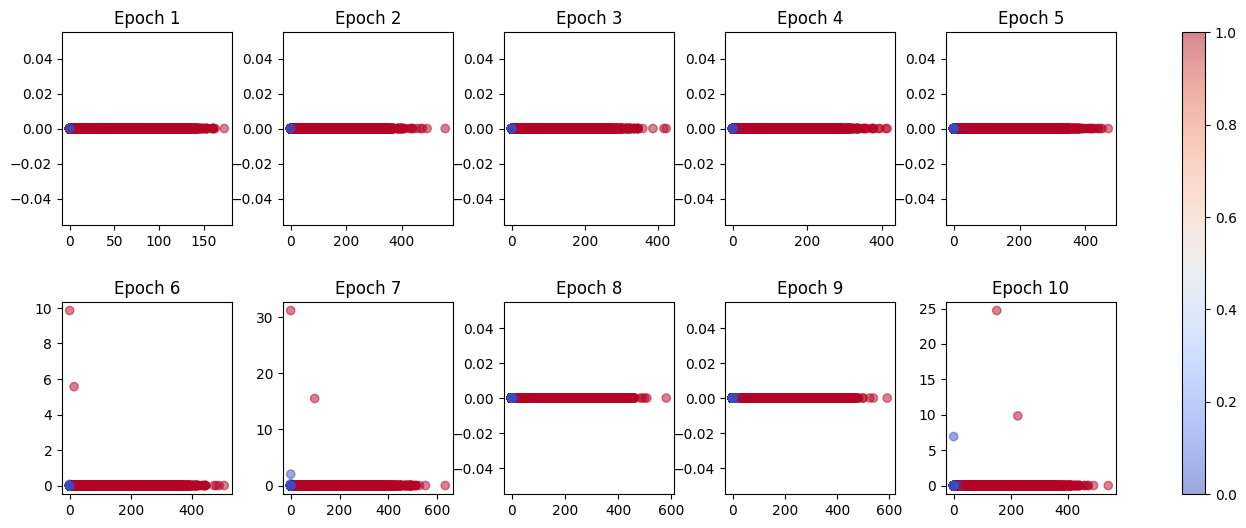

In [19]:
import matplotlib.pyplot as plt

# 中間層の出力を散布図にプロットする
fig, axs = plt.subplots(2, 5, figsize=(17, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.3)
for i in range(10):
    row = i // 5
    col = i % 5
    axs[row, col].scatter(intermediate_outputs[i][:, 0], intermediate_outputs[i][:, 1], c=y_train, cmap='coolwarm', alpha=0.5)
    axs[row, col].set_title(f'Epoch {i+1}')

# カラーマップを取得してカラーバーとして表示
fig.colorbar(axs[0, 0].collections[0], ax=axs, location='right')
plt.show()

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 2)                 258       
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 100741 (393.52 KB)
Trainable params: 100741 (393.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
import tensorflow.keras.backend as K
# モデルのパラメータを初期化する
K.clear_session()

# モデルを定義する
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# モデルをコンパイルする
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# モデルをトレーニングする
my_callback = MyCallback()
model.fit(x_train, y_train, epochs=10, callbacks=[my_callback])

# 中間層の出力をリストに格納する
intermediate_outputs = my_callback.intermediate_outputs
print('Intermediate output shape:', intermediate_outputs[0].shape)

model.summary()

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.8619 - accuracy: 0.8562
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1913 - accuracy: 0.9284
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1509 - accuracy: 0.9449
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1251 - accuracy: 0.9542
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1160 - accuracy: 0.9570
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1114 - accuracy: 0.9600
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1040 - accuracy: 0.9636
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1010 - accuracy: 0.9644
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0952 - accuracy: 0.9665
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

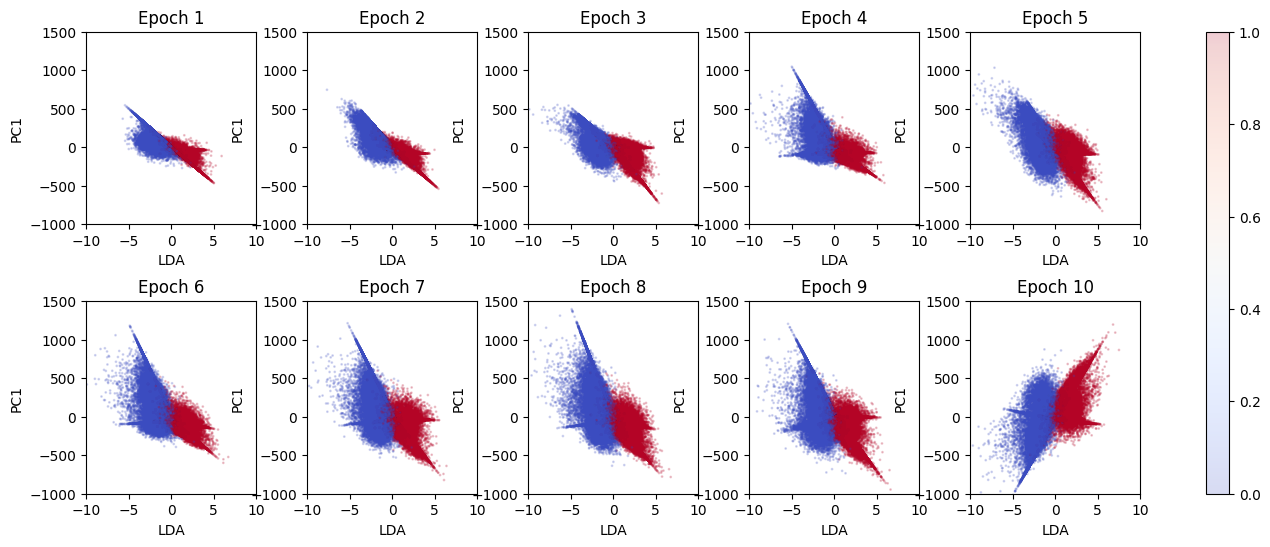

In [42]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# 中間層の出力を散布図にプロットする
fig, axs = plt.subplots(2, 5, figsize=(17, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.3)
for i in range(10):
    row = i // 5
    col = i % 5

    # 中間層の出力をXに代入
    X = np.array(intermediate_outputs[i])

    # PCAオブジェクトを作成し、fit_transform()メソッドで主成分分析を実行
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(X)

    # LDAオブジェクトを作成し、fit_transform()メソッドで線形判別分析を実行
    lda = LDA(n_components=1)
    lda_result = lda.fit_transform(X, y_train)

    axs[row, col].scatter(lda_result[:], pca_result[:, 0], c=y_train, cmap='coolwarm', alpha=0.2, s=1)
    axs[row, col].set_xlabel('LDA')
    axs[row, col].set_ylabel('PC1')
    axs[row, col].set_xlim(-10,10)
    axs[row, col].set_ylim(-1000,1500)
    axs[row, col].set_title(f'Epoch {i+1}')

# カラーマップを取得してカラーバーとして表示
fig.colorbar(axs[0, 0].collections[0], ax=axs, location='right')
plt.show()
